<a href="https://colab.research.google.com/github/OvinduWijethunge/Machine_Learning_Projects/blob/version-1/youtube%20spam%20classifier/GradientBoost%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#df = pd.read_csv('model.csv')
url = 'https://raw.githubusercontent.com/OvinduWijethunge/Machine_Learning_Projects/master/youtube%20spam%20classifier/model.csv'
df = pd.read_csv(url)

In [3]:
df.head()

,Unnamed: 0,sim_content,sim_comment,word_count,duplicate_word_ratio,no_of_sentences,length_of_comment,num_of_punctuations,is_period_sequence,stop_word_ratio,post_coment_gap,black_word_count,is_link,is_youtube_link,is_number,comment_duplication,is_spam
0,0,0.265993,0.239773,1.402189,0.000000,1,3.137146,0.0,0,0.0,39.978929,0.200000,0,0,0,0.0,0
1,1,0.327118,0.222346,2.769147,0.000000,1,4.905188,0.0,0,0.0,39.978929,0.000000,0,0,0,0.0,0
2,2,0.433986,0.309582,3.532625,0.032258,1,5.719015,0.0,0,0.0,39.978929,0.064516,0,0,0,0.0,0
3,3,0.201988,0.181141,1.818371,0.000000,1,3.770442,0.0,0,0.0,39.978929,0.000000,0,0,0,0.0,0
4,4,0.176259,0.125743,1.402189,0.000000,1,3.011349,0.0,0,0.0,39.978929,0.000000,0,0,0,0.0,0


In [4]:
df.rename(columns={'Unnamed: 0':'id'},inplace=True)
df.columns

Index(['id', 'sim_content', 'sim_comment', 'word_count',
       'duplicate_word_ratio', 'no_of_sentences', 'length_of_comment',
       'num_of_punctuations', 'is_period_sequence', 'stop_word_ratio',
       'post_coment_gap', 'black_word_count', 'is_link', 'is_youtube_link',
       'is_number', 'comment_duplication', 'is_spam'],
      dtype='object')

#### Standardization  is no need for gb

In [5]:
dfc = df.copy()

In [6]:
y = dfc['is_spam']
X = dfc.drop(['is_spam','id'],axis=1)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Handle imbalnce dataset (here we gonna use oversampling instead of smotec)

In [8]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

os=RandomOverSampler(0.9)
X_train_ns,y_train_ns=os.fit_sample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

X_train = X_train_ns
y_train = y_train_ns

The number of classes before fit Counter({0: 6891, 1: 553})
The number of classes after fit Counter({0: 6891, 1: 6201})


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


#### Hyperparameter Tuninng

In [9]:
from sklearn.ensemble import GradientBoostingClassifier

In [10]:
gb = GradientBoostingClassifier()

In [11]:
gb.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [12]:
grid={
    'learning_rate':[0.15,0.1,0.05,0.01,0.005,0.001], 
    'n_estimators':[100,250,500,750,1000,1250,1500,1750],
    'max_depth':[2,3,4,5,6,7],
    'min_samples_split':[2,4,6,8,10,20,40,60,100], 
    'min_samples_leaf':[1,3,5,7,9],
    'max_features':[2,3,4,5,6,7],
    'subsample':[0.7,0.75,0.8,0.85,0.9,0.95,1]
}

In [13]:
from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=10, shuffle=True)

In [14]:
from sklearn.model_selection import RandomizedSearchCV
gb_random = RandomizedSearchCV(estimator=gb, param_distributions=grid, n_jobs=-1,n_iter = 100, cv=cv, scoring='accuracy',error_score=0,return_train_score=True,verbose=2)

In [15]:
gb_random.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 30.2min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 55.4min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed: 86.9min finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
                   error_score=0,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                    

#### Evaluvate

In [16]:
best_model = gb_random.best_estimator_

In [17]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=7,
                           max_features=7, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=7, min_samples_split=4,
                           min_weight_fraction_leaf=0.0, n_estimators=1250,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=0.7, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [18]:
gb_random.best_params_

{'learning_rate': 0.05,
 'max_depth': 7,
 'max_features': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 4,
 'n_estimators': 1250,
 'subsample': 0.7}

In [19]:
gb_random.best_score_

0.9935081263594958

In [20]:
y_pred = best_model.predict(X_test)

In [21]:
err  =(y_pred- y_test)

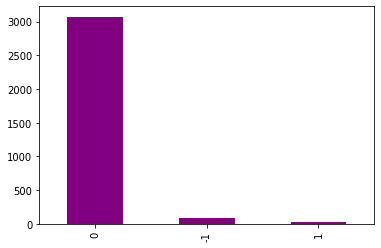

In [22]:
err.value_counts().plot(kind='bar',color='purple')

In [23]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test,y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.036979003447195236
MSE: 0.036979003447195236
RMSE: 0.19229925493146155


Text(0, 0.5, 'Feature Importance Score')

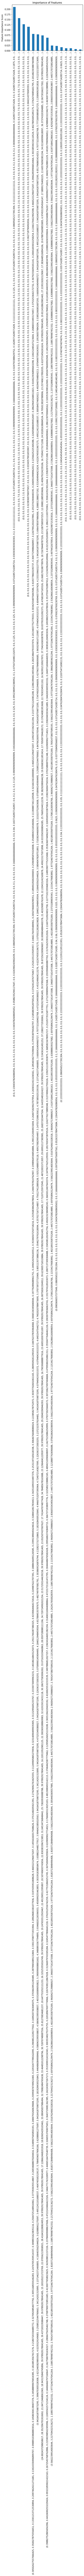

In [24]:
indices=list(X_train)
feat_imp = pd.Series(best_model.feature_importances_, indices).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

In [25]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2903   29]
 [  89  170]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2932
           1       0.85      0.66      0.74       259

    accuracy                           0.96      3191
   macro avg       0.91      0.82      0.86      3191
weighted avg       0.96      0.96      0.96      3191



In [26]:
print("accuracy is {}".format(best_model.score(X_test, y_test)))

accuracy is 0.9630209965528047


In [27]:
#import pickle
# open a file, where you ant to store the data
#file = open('random_forest_regression_model_v2.pkl', 'wb')
# dump information to that file
#pickle.dump(rf_random, file)

## ROC curve

In [28]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [29]:
baseline_roc_auc = roc_auc_score(y_test, best_model.predict(X_test))
fprB, tprB, thresholdsB = roc_curve(y_test, best_model.predict_proba(X_test)[:,1])

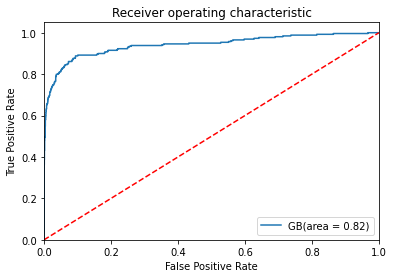

In [30]:
plt.figure()
plt.plot(fprB, tprB, label='GB(area = %0.2f)' % baseline_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

**Recall - presicion with threshold values**

(0.0, 1.0)

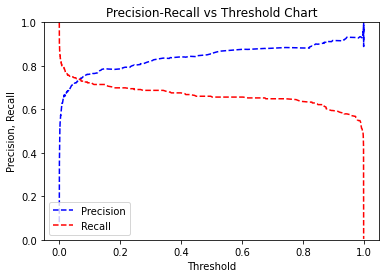

In [31]:
### Predict test_y values and probabilities based on random forest model
probs_y=best_model.predict_proba(X_test) 
  # probs_y is a 2-D array of probability of being labeled as 0 (first column of array) vs 1 (2nd column in array)

from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test, probs_y[:, 1]) 
   #retrieve probability of being 1(in second column of probs_y)
pr_auc = metrics.auc(recall, precision)

plt.title("Precision-Recall vs Threshold Chart")
plt.plot(thresholds, precision[: -1], "b--", label="Precision")
plt.plot(thresholds, recall[: -1], "r--", label="Recall")
plt.ylabel("Precision, Recall")
plt.xlabel("Threshold")
plt.legend(loc="lower left")
plt.ylim([0,1])

In [32]:
import pickle
#open a file, where you ant to store the data
file = open('gboost.pkl', 'wb')
# dump information to that file
pickle.dump(best_model, file)